In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [101]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


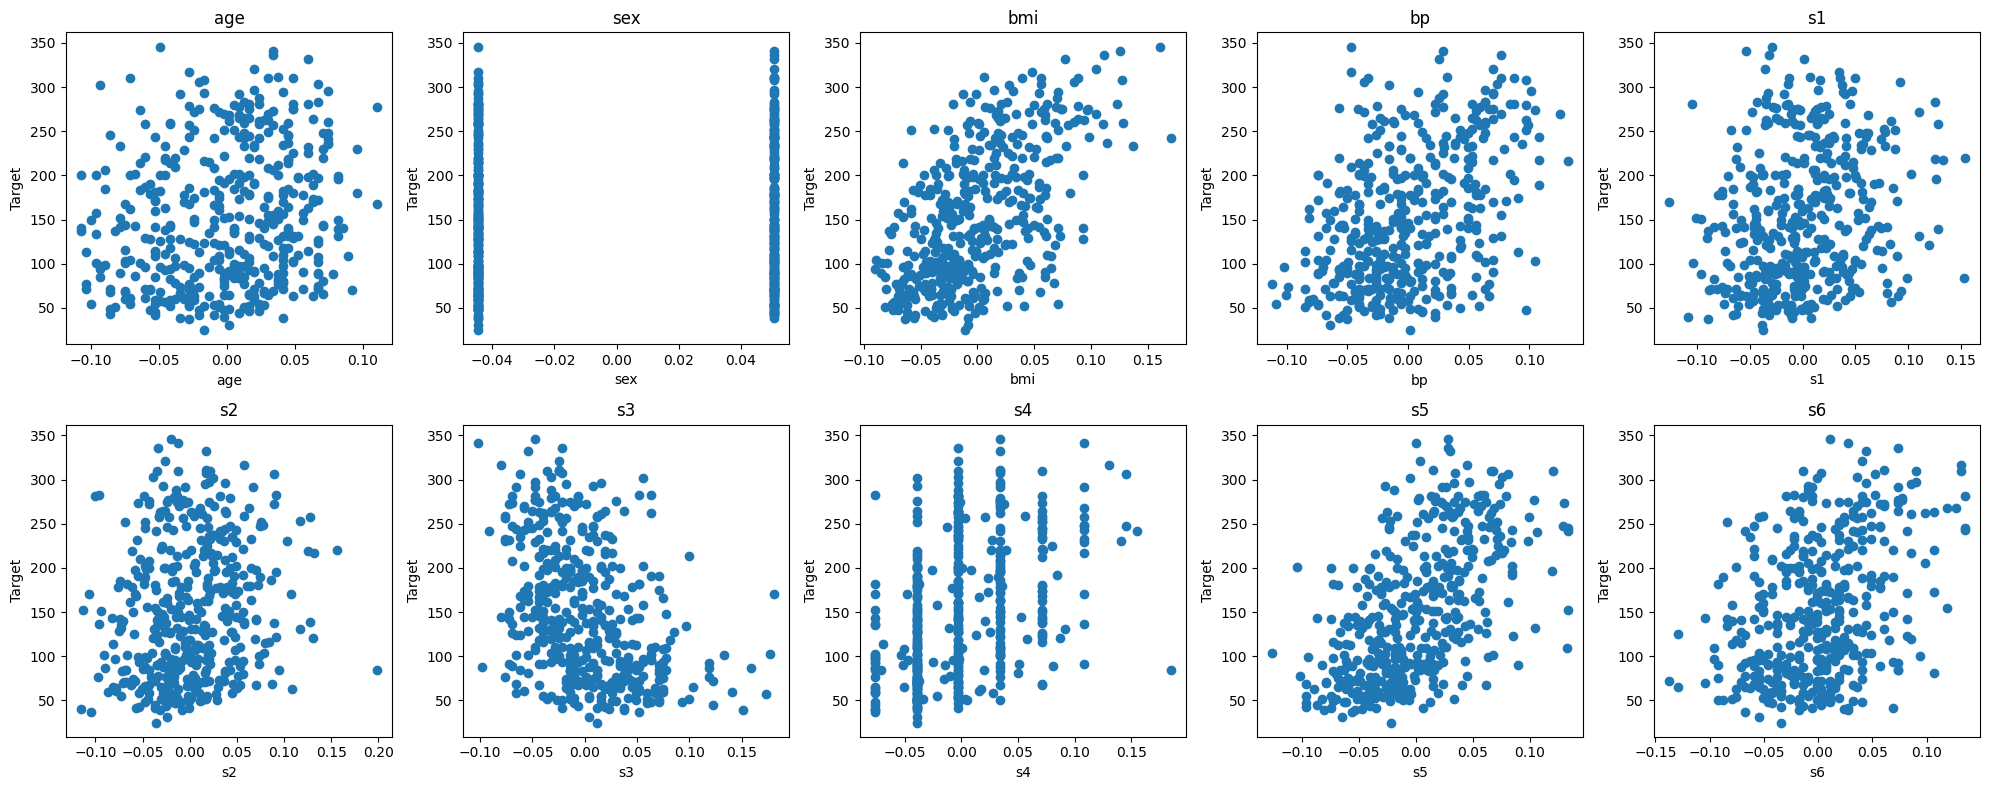

In [102]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  
axes = axes.flatten()  

for idx, feature in enumerate(diabetes.feature_names):
    axes[idx].scatter(df[feature], df['target'])
    axes[idx].set_title(feature)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Target')

plt.tight_layout()  
plt.show()

In [103]:
X = df["bmi"].values.reshape(-1,1)
y = df["target"].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [109]:
def LSM(x, y):

    x = np.array(x)
    y = np.array(y)
    n = len(x)

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_xy = np.sum(x * y)

    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x ** 2)

    return a, b

X = diabetes.data[:, np.newaxis, 2] 
y = diabetes.target

a, b = LSM(X_train.squeeze().tolist(), y_train.tolist())
my_y_pred = []
for x in X_test:
    my_y_pred.append(b + a * x)

In [112]:
print(f"Sklearn coefficient: {regressor.intercept_}, {regressor.coef_}")
print(f"My coefficient: {b}, {a}")

Sklearn coefficient: 152.28824927379569, [981.65543614]
My coefficient: 152.2882492737957, 981.6554361411933


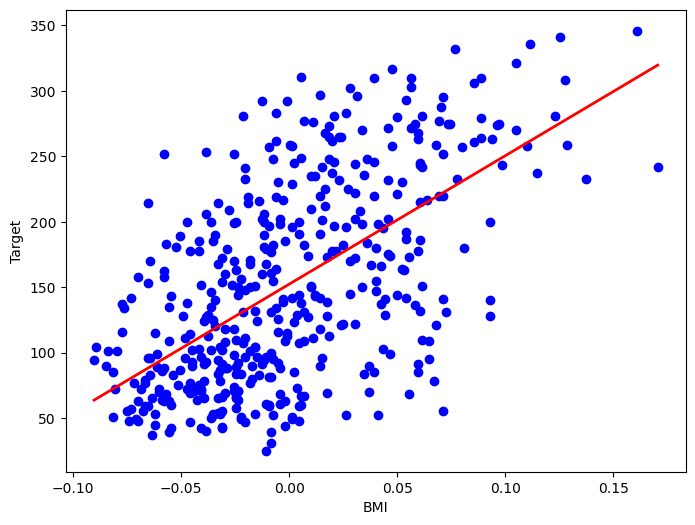

In [106]:
x_line = np.linspace(df['bmi'].min(), df['bmi'].max(), 100)
y_line = b + a * x_line

plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['target'], color='blue')
plt.plot(x_line, y_line, color='red', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Target')
plt.show()

In [107]:
df = pd.DataFrame({'Actual': y_test, 'Sklearn': y_pred, 'LSM': my_y_pred}) 
df

,Actual,Sklearn,LSM
0,321.0,255.174269,[255.1742690506989]
1,215.0,211.794626,[211.79462571068717]
2,127.0,161.008702,[161.00870180042955]
3,64.0,129.267499,[129.26749935651856]
4,175.0,196.982065,[196.9820645701954]
...,...,...,...
84,104.0,64.727054,[64.72705438723284]
85,49.0,82.713736,[82.71373577211574]
86,103.0,194.865984,[194.86598440726794]
87,142.0,166.298902,[166.29890220774806]
